In [86]:
import matplotlib.pyplot as plt
import random
import numpy as np
from collections import defaultdict
import math
from scipy import stats

# **ЛР 2.2**

In [87]:
ages = []
with open('moscow_2021.txt', 'r') as f:
    for l in f.readlines():
        ages.append(int(l.strip()))

## _Функции характеристик_

In [88]:
def init_moment_k(nums: list, k: int = 1) -> float:
    sum_k=0
    for n in nums:
        sum_k+=n**k
    return sum_k/len(nums)

def cent_moment_k(nums: list, k: int) -> float:
    dif_sum_k = 0
    mean_num = init_moment_k(nums)
    for n in nums:
        dif_sum_k+=(n-mean_num)**k
    return dif_sum_k/len(nums)

## _Функции для выборок_

t — коэффициент кратности ошибки, определяемый по таблице значений функции Лапласа

$\Phi(t) = \gamma/2$

Для $\gamma = 0.95$ по таблице $t=1.96$


#### `norm_dist_density(x, mu, sigma)`
Returns result of $\frac{1}{\sigma\sqrt{2\pi}}e^{\frac{(x-\mu)^2}{2\sigma ^2}}$

In [89]:
def repeating_sample_number(stand_dev: float, precision: float, multiplicity: float) -> int:
    '''**multiplicity** means **t**
    **precision** means **delta**'''
    return math.ceil((multiplicity*stand_dev/precision)**2)


def get_sample(nums: list, sample_size: int) -> list:
    res = []
    for i in random.sample(range(0, len(nums)), sample_size):
        res.append(nums[i])
    return res


norm_dist_density = lambda x, mu, sigma: np.exp(-(x-mu)**2 / (2*sigma**2)) / (sigma*(2*np.pi)**0.5)

## _Работа с данными_

### Условия
Полагая, что распределение среднего возраста подчиняется
нормальному закону, осуществите выравнивание статистического ряда.

Найти точечные оценки методом моментов.

---

Параметры точности были взяты с прошлой лабораторной

In [90]:
precision = 3
t = 1.96
samples_number = 36
trustworthy = 0.95

stand_deviation = cent_moment_k(ages, 2)**0.5

In [91]:
ages_sample_size = repeating_sample_number(stand_deviation, precision, t)

ages_sample_means = []
for _ in range(samples_number):
    ages_sample_means.append(init_moment_k(get_sample(ages, ages_sample_size), 1))

ages_sample_mean_expectancy = init_moment_k(ages_sample_means)
ages_sample_mean_stand_deviat = cent_moment_k(ages_sample_means, 2)**0.5


means_dict = defaultdict(int)
for m in ages_sample_means:
    means_dict[int(m)]+=1

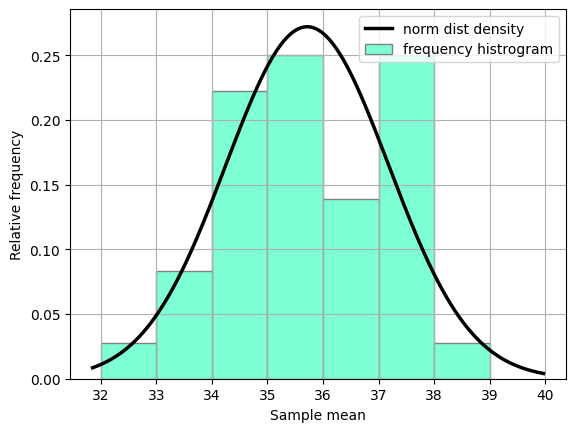

In [92]:
val, weight = zip(*[(v, w) for v, w in means_dict.items()])

fig, ax = plt.subplots()

# doing interval histogram
ax.bar(val, np.array(weight)/sum(weight), width=1, align='edge', edgecolor='gray', color='aquamarine', label='frequency histrogram')

# doing normal disribution density
x_density = np.linspace(min(ages_sample_means)-1, max(ages_sample_means)+1, 1000)
y_density = norm_dist_density(x_density, ages_sample_mean_expectancy, ages_sample_mean_stand_deviat)
ax.plot(x_density, y_density, c='black', lw=2.5, label ='norm dist density')

# style
ax.set_xlabel('Sample mean')
ax.set_ylabel('Relative frequency')
ax.legend()
ax.grid()

#### ***Доверительный интервал***

Будем считать доверительный интервал для выборки, где $n=36$

In [93]:
# написать функцию для t_gamma
def get_tgamma(alpha: float, freedom_degree: int):
    return stats.t.ppf(1-alpha/2, df=freedom_degree)

def corrected_dispersion(nums: list) -> float:
    bessel_corr = len(nums)/(len(nums)-1)
    return bessel_corr*cent_moment_k(nums, 2)**0.5


def assessment_precision(t_gamma: float, corr_disper: float, sample_size: float) -> float:
    return t_gamma*corr_disper/sample_size**0.5

In [95]:
exact_sample = get_sample(ages, ages_sample_size)
# sample_size = 62


# t_gamma = linaer_interpol(ages_sample_size, n0, t0, n1, t1)
t_gamma = get_tgamma((1-trustworthy), ages_sample_size-1)
s = corrected_dispersion(exact_sample)
exact_sample_precision = assessment_precision(t_gamma, s, len(exact_sample))
exact_sample_mean = init_moment_k(exact_sample)

print(f'exact_sample_mean = {exact_sample_mean:.3f}')
print(f't_gamma = {t_gamma:.3f}')
print(f'exact_sample_precision = {exact_sample_precision:.3f}')
print(f'{exact_sample_mean-exact_sample_precision:.3f} < a < {exact_sample_mean+exact_sample_precision:.3f}')

exact_sample_mean = 35.581
t_gamma = 2.000
exact_sample_precision = 2.984
32.597 < a < 38.564
